# 5. SVM Algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC



In [3]:
# Read the CSV file 'milk.csv' into a pandas DataFrame 'df'
df = pd.read_csv("milkdata.csv")
df

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [4]:
# Shows a tuple with row and column size
df.shape

(1059, 8)

In [5]:
# Returns the first few rows of the DataFrame df
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [6]:
# Check for missing values (NaNs) in each column of the DataFrame 'df' and compute their sum
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [7]:
# Gives the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [8]:
# gives basic statistics of the dataset
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


## Three Interesting Insights from Dataset

### 1.pH vs. Milk Grade Quality
Milk with low pH (<6.5) tends to be sour and of lower quality. Checking the average pH per grade helps understand how pH affects milk classification.

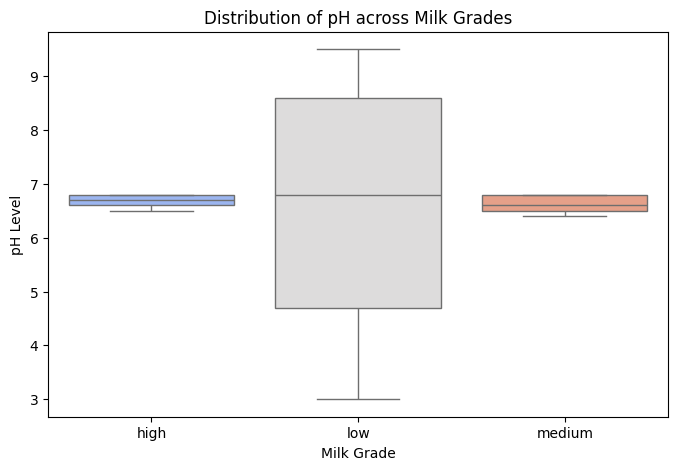

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Grade", y="pH", data=df, hue="Grade", palette="coolwarm")
plt.title("Distribution of pH across Milk Grades")
plt.xlabel("Milk Grade")
plt.ylabel("pH Level")
plt.show()


### 2. Temperature vs. Milk Grade
Higher storage temperatures may accelerate milk spoilage, leading to lower grades.

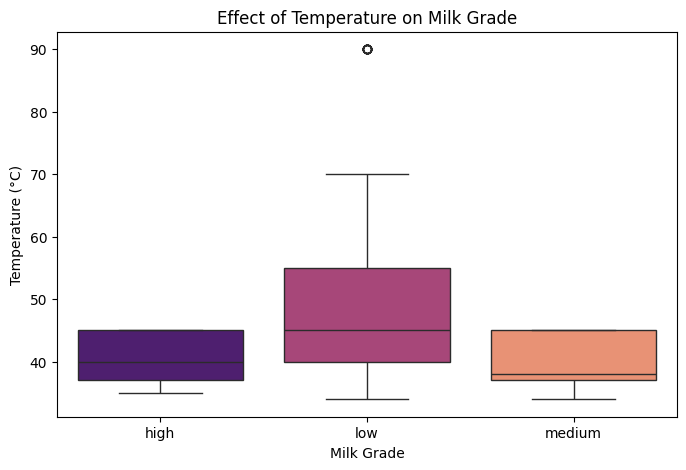

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Grade", y="Temprature", data=df, hue="Grade", palette="magma")
plt.title("Effect of Temperature on Milk Grade")
plt.xlabel("Milk Grade")
plt.ylabel("Temperature (°C)")
plt.show()


### 3.Colour vs. Milk Grade
Milk should be white to slightly yellowish. If the dataset shows colour variations in lower grades, it indicates contamination or degradation.

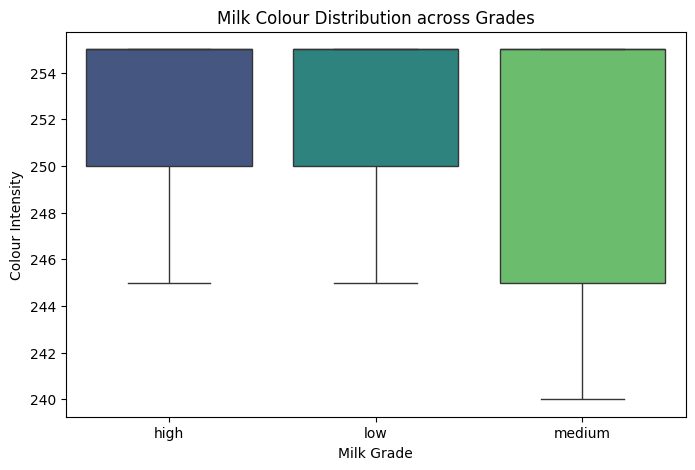

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Grade", y="Colour", data=df, hue="Grade", palette="viridis")
plt.title("Milk Colour Distribution across Grades")
plt.xlabel("Milk Grade")
plt.ylabel("Colour Intensity")
plt.show()



In [12]:
# Create a new DataFrame 'x' by dropping the column "Grade" from the original DataFrame 'df'
x = df.drop(columns= "Grade")
x

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


In [13]:
# Create a Series 'y' containing data from the column "Grade" of the original DataFrame 'df'
y = df["Grade"]
y

0         high
1         high
2          low
3          low
4       medium
         ...  
1054    medium
1055      high
1056       low
1057      high
1058       low
Name: Grade, Length: 1059, dtype: object

In [14]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [15]:
#standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
from imblearn.over_sampling import SMOTE

#smote for balancing the data
print("\n🔹 Before SMOTE class distribution:")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

print("\n After SMOTE class distribution:")
print(pd.Series(y_train).value_counts())


🔹 Before SMOTE class distribution:
Grade
low       313
medium    258
high      170
Name: count, dtype: int64

 After SMOTE class distribution:
Grade
medium    313
high      313
low       313
Name: count, dtype: int64


In [17]:
# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

In [18]:
from sklearn.model_selection import GridSearchCV

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [19]:
# Initialize SVM with the best parameters from GridSearchCV
best_svm = grid_search.best_estimator_

# Train the model using the best SVM
best_svm.fit(x_train, y_train)

# Predictions on the test set
y_pred = best_svm.predict(x_test)

In [20]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9905660377358491


In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 86   0   0]
 [  2 113   1]
 [  0   0 116]]
